In [ ]:
#The dataset is called AB_NYC_2019.csv, which was retreived from kaggle.com. The dataset shows the room type, neighborhood,
#price, reviews and availability for different airbnb rentals that are located in NYC, for the year of 2019. 
#The dataset was last updated 8 months ago and contains over 48,000 lines of data. One question I have is how much is the
#average Airbnb rental price in NYC? Another question is which neighborhood was the most expensive to live in?

In [1]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\Goombakiller55\\Documents\\College\\Spring 2020\\DATA 201'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%pylab inline
df=pd.read_csv("AB_NYC_2019.csv")

Populating the interactive namespace from numpy and matplotlib


In [4]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [6]:
df.shape

(48895, 16)

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
df.loc[df['price'].idxmax()]

id                                                            7003697
name                              Furnished room in Astoria apartment
host_id                                                      20582832
host_name                                                    Kathrine
neighbourhood_group                                            Queens
neighbourhood                                                 Astoria
latitude                                                      40.7681
longitude                                                    -73.9165
room_type                                                Private room
price                                                           10000
minimum_nights                                                    100
number_of_reviews                                                   2
last_review                                                2016-02-13
reviews_per_month                                                0.04
calculated_host_list

In [9]:
df.describe(include='all') 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [10]:
df.keys()


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

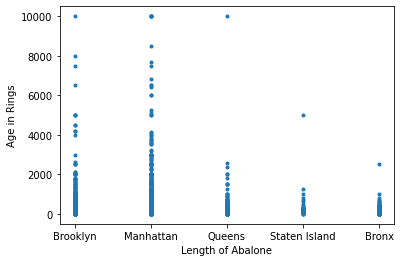

In [23]:
plt.plot(df['neighbourhood_group'], df['price'], marker='.', linestyle='none') 
plt.xlabel('Length of Abalone')
plt.ylabel('Age in Rings')
plt.show()

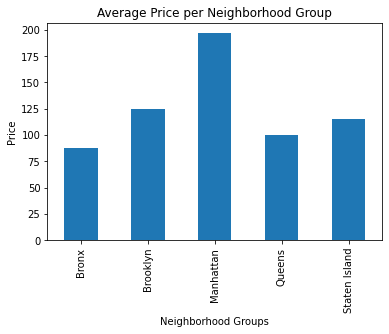

In [15]:
df.groupby("neighbourhood_group")['price'].mean().plot(kind='bar')
plt.title("Average Price per Neighborhood Group")
plt.xlabel("Neighborhood Groups")
plt.ylabel("Price")
plt.show()

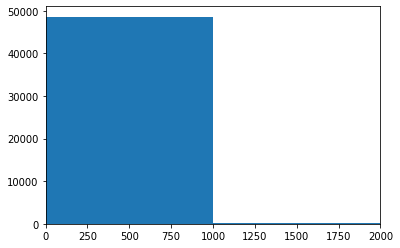

In [21]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
pyplot.hist(df.price)
pyplot.xlim(0,2000)
pyplot.show()

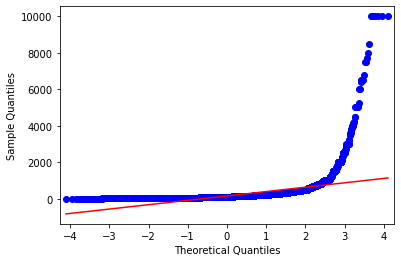

In [19]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(df.price, line='s')
pyplot.show()

In [16]:
x = df.iloc[:, 1:7]
y = df.iloc[:,-1] 

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 9)

In [19]:
x_train.shape, y_train.shape


((34226, 6), (34226,))

In [20]:
x_test.shape, y_test.shape


((14669, 6), (14669,))

In [21]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

ValueError: could not convert string to float: 'GRACIOUS HARLEM 1 BEDROOM'